In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV


warnings.simplefilter("ignore")
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_csv("data2.csv")
# Converting Date column to datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')
# Renaming columns
data.columns = ['Date', 'Hour', 'Consumption']
# Removing commas (corresponds orders) from float values
data['Consumption'] = data['Consumption'].str.replace(',', '').astype(float)

In [3]:
# First 5 observations
data.head(5)

,Date,Hour,Consumption
0,2016-01-01,00:00,26277.24
1,2016-01-01,01:00,24991.82
2,2016-01-01,02:00,23532.61
3,2016-01-01,03:00,22464.78
4,2016-01-01,04:00,22002.91


In [4]:
# Adding lagged values by shifting dataframe's columns and concatenating them
data = pd.concat([data, 
                  data[['Consumption']].shift(48), 
                  data[['Consumption']].shift(168)], axis=1)
data.columns = ['Date', 'Hour', 'Consumption', 'Consumption_Lag48', 'Consumption_Lag168']
data.tail()

,Date,Hour,Consumption,Consumption_Lag48,Consumption_Lag168
33907,2019-11-14,19:00,36772.84,36612.23,36504.89
33908,2019-11-14,20:00,35535.35,35767.79,35595.11
33909,2019-11-14,21:00,34472.70,34839.43,34612.47
33910,2019-11-14,22:00,31117.83,33772.44,33572.96
33911,2019-11-14,23:00,0.00,32387.93,32140.43


In [5]:
# Splitting train and test data from 1 November 2019
test = data[data['Date'] >= '2019-11-01']
train = data[data['Date'] < '2019-11-01']
print(len(test), len(train))

336 33576


In [6]:
# Removing NA or missing values from the data
train = train.dropna()
test = test[test['Consumption'] > 0]
test.head()

,Date,Hour,Consumption,Consumption_Lag48,Consumption_Lag168
33576,2019-11-01,00:00,29417.56,27154.21,29563.43
33577,2019-11-01,01:00,28133.75,26157.42,28242.90
33578,2019-11-01,02:00,27358.60,25373.88,27258.74
33579,2019-11-01,03:00,26780.09,24911.43,26739.84
33580,2019-11-01,04:00,26511.54,24836.11,26555.35


In [7]:
def calculate_mape(actual_col, predicted_col):
  actual_col, predicted_col = np.array(actual_col), np.array(predicted_col)
  assert len([i for i in actual_col if i <= 0]) == 0, \
    "There are nonpositive values in actual column, consider dropping those observations from the data."
  return np.mean(np.abs((actual_col - predicted_col) / actual_col)) * 100

In [8]:
answer_a_2 = calculate_mape(test['Consumption'], test['Consumption_Lag48'])
print(answer_a_2)

7.583710371906059


In [9]:
answer_a_7 = calculate_mape(test['Consumption'], test['Consumption_Lag168'])
print(answer_a_7)

3.305342386256597


# b

In [10]:
def linear_reg_fnc(train_data, test_data, X, y, return_val=False):
  train_X, train_y = train_data[X], train_data[y]
  test_X, test_y = test_data[X], test_data[y]
  reg = LinearRegression().fit(train_X, train_y)
  predicted = reg.predict(test_X)
  actual = np.array(test_y)
  print(''.format(
    reg.coef_[0][0], reg.coef_[0][1], reg.intercept_[0]))
  mape = calculate_mape(actual, predicted)
  print('MAPE is {}'.format(mape))
  print('{} = {} + {}'.format(y[0], np.round(reg.intercept_[0], 4),
                              ' + '.join(['{} * {}'.format(np.round(reg.coef_[0][i], 4), x) 
                                          for i,x in enumerate(X)])))
  if return_val:
    return mape

In [11]:
answer_b = linear_reg_fnc(train, test, ['Consumption_Lag48', 'Consumption_Lag168'], ['Consumption'], return_val=True)


MAPE is 4.1563391643966
Consumption = 1623.7675 + 0.3257 * Consumption_Lag48 + 0.6246 * Consumption_Lag168


# c

In [13]:
hour_list = train['Hour'][:24].tolist()
mape_list_c = []
for hour in hour_list:
  mape_list_c.append(
    linear_reg_fnc(train[train['Hour'] == hour], 
                 test, 
                 X=['Consumption_Lag48', 'Consumption_Lag168'], 
                 y=['Consumption'],
                 return_val=True))
  print('\n')



MAPE is 5.158376225814664
Consumption = 2395.497 + 0.5028 * Consumption_Lag48 + 0.4199 * Consumption_Lag168



MAPE is 5.234665231014028
Consumption = 2314.1506 + 0.5071 * Consumption_Lag48 + 0.4142 * Consumption_Lag168



MAPE is 5.324703498171828
Consumption = 2377.5178 + 0.5088 * Consumption_Lag48 + 0.4072 * Consumption_Lag168



MAPE is 5.358562346397468
Consumption = 2425.915 + 0.5016 * Consumption_Lag48 + 0.4104 * Consumption_Lag168



MAPE is 5.30664442671436
Consumption = 2455.1386 + 0.4829 * Consumption_Lag48 + 0.427 * Consumption_Lag168



MAPE is 5.198556974837283
Consumption = 2658.0239 + 0.4456 * Consumption_Lag48 + 0.4563 * Consumption_Lag168



MAPE is 4.886889261313905
Consumption = 2677.8287 + 0.3762 * Consumption_Lag48 + 0.5253 * Consumption_Lag168



MAPE is 4.322836161325908
Consumption = 2935.6765 + 0.2656 * Consumption_Lag48 + 0.6315 * Consumption_Lag168



MAPE is 3.7362615370496934
Consumption = 4045.4158 + 0.1753 * Consumption_Lag48 + 0.699 * Consumption_Lag16

In [15]:
for hour in hour_list:
  print('Hour: {}'.format(hour))
  linear_reg_fnc(train[train['Hour'] == hour], 
               test[test['Hour'] == hour], 
                 X=['Consumption_Lag48', 'Consumption_Lag168'], 
                 y=['Consumption'])
  print('\n')

Hour: 00:00

MAPE is 3.071157293930384
Consumption = 2395.497 + 0.5028 * Consumption_Lag48 + 0.4199 * Consumption_Lag168


Hour: 01:00

MAPE is 3.1702107971871056
Consumption = 2314.1506 + 0.5071 * Consumption_Lag48 + 0.4142 * Consumption_Lag168


Hour: 02:00

MAPE is 3.3046363428777683
Consumption = 2377.5178 + 0.5088 * Consumption_Lag48 + 0.4072 * Consumption_Lag168


Hour: 03:00

MAPE is 3.3392191405986518
Consumption = 2425.915 + 0.5016 * Consumption_Lag48 + 0.4104 * Consumption_Lag168


Hour: 04:00

MAPE is 3.3378554137300323
Consumption = 2455.1386 + 0.4829 * Consumption_Lag48 + 0.427 * Consumption_Lag168


Hour: 05:00

MAPE is 3.198825003450799
Consumption = 2658.0239 + 0.4456 * Consumption_Lag48 + 0.4563 * Consumption_Lag168


Hour: 06:00

MAPE is 3.7406250016926013
Consumption = 2677.8287 + 0.3762 * Consumption_Lag48 + 0.5253 * Consumption_Lag168


Hour: 07:00

MAPE is 4.393898026164806
Consumption = 2935.6765 + 0.2656 * Consumption_Lag48 + 0.6315 * Consumption_Lag168


Hour: 

## d

In [16]:
data.head()

,Date,Hour,Consumption,Consumption_Lag48,Consumption_Lag168
0,2016-01-01,00:00,26277.24,NaN,NaN
1,2016-01-01,01:00,24991.82,NaN,NaN
2,2016-01-01,02:00,23532.61,NaN,NaN
3,2016-01-01,03:00,22464.78,NaN,NaN
4,2016-01-01,04:00,22002.91,NaN,NaN


In [17]:
data_wide = data.pivot(index='Date', columns='Hour', values=['Consumption_Lag48', 'Consumption_Lag168'])
data_wide.columns = ['Lag_day_{}_hour_{}'.format(i, j) for i in (2, 7) for j in range(24)]
data_wide = data_wide.dropna().reset_index()
data_wide.head()

,Date,Lag_day_2_hour_0,Lag_day_2_hour_1,Lag_day_2_hour_2,Lag_day_2_hour_3,Lag_day_2_hour_4,Lag_day_2_hour_5,Lag_day_2_hour_6,Lag_day_2_hour_7,Lag_day_2_hour_8,...,Lag_day_7_hour_14,Lag_day_7_hour_15,Lag_day_7_hour_16,Lag_day_7_hour_17,Lag_day_7_hour_18,Lag_day_7_hour_19,Lag_day_7_hour_20,Lag_day_7_hour_21,Lag_day_7_hour_22,Lag_day_7_hour_23
0,2016-01-08,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
1,2016-01-09,28763.95,27284.84,26321.95,25748.49,25636.58,25932.52,26963.74,28444.83,32804.27,...,32796.18,32594.55,33358.47,34387.95,33591.26,32648.83,31897.73,31049.20,30906.43,29621.09
2,2016-01-10,28602.02,27112.37,25975.34,25315.55,25128.15,25356.22,26338.72,28086.42,32702.24,...,31056.47,30979.53,32297.46,33462.96,33151.03,32450.21,32093.93,31315.16,31014.19,29462.06
3,2016-01-11,29906.93,28061.98,26808.78,25798.80,25820.46,26035.77,26451.24,26853.42,30627.32,...,39661.98,39211.00,39760.12,39633.29,37621.41,35954.18,35114.12,34066.40,33686.83,31733.54
4,2016-01-12,28890.37,27133.75,25656.13,24937.87,24538.16,24616.05,24478.14,23813.35,24676.92,...,38086.11,37834.89,38599.34,38669.63,36954.78,35306.11,34301.59,33400.82,33359.37,31629.97


In [18]:
# TO SEE CORR MATRIX, WHITER COLOR MEANS MORE SIMILAR

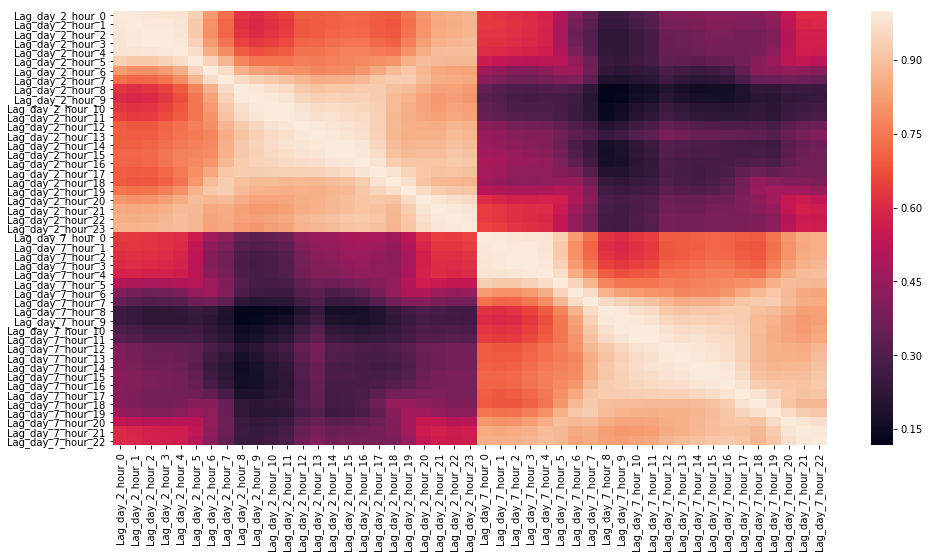

In [22]:
corr = data_wide.iloc[:,1:-1].corr()

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [20]:
mape_list_d = []
for hour in hour_list:
  X = data_wide.iloc[:,1:]
  y = np.ravel(data.loc[(data['Date'].isin(data_wide.Date)) & (data['Hour'] == hour), 'Consumption'])
  reg = LassoCV(cv=10, normalize=True, tol=0.001, 
                selection='random', random_state=43,
                alphas=np.logspace(-4, 2, 100))
  reg.fit(X, y)
  mape_list_d.append(calculate_mape(reg.predict(X), y))

  print('For {} hour, column with max coefficient is {}'
        .format(hour, X.columns[np.argmax(reg.coef_)]))
  # fig, ax = plt.subplots(figsize=(12,8))
  # sns.barplot(x=X.columns, y=reg.coef_, color='c')
  # plt.xticks(rotation=90)
  # plt.title(hour)
  # plt.show()

For 00:00 hour, column with max coefficient is Lag_day_2_hour_23
For 01:00 hour, column with max coefficient is Lag_day_2_hour_23
For 02:00 hour, column with max coefficient is Lag_day_2_hour_23
For 03:00 hour, column with max coefficient is Lag_day_2_hour_23
For 04:00 hour, column with max coefficient is Lag_day_2_hour_23
For 05:00 hour, column with max coefficient is Lag_day_2_hour_23
For 06:00 hour, column with max coefficient is Lag_day_2_hour_23
For 07:00 hour, column with max coefficient is Lag_day_7_hour_7
For 08:00 hour, column with max coefficient is Lag_day_2_hour_13
For 09:00 hour, column with max coefficient is Lag_day_2_hour_13
For 10:00 hour, column with max coefficient is Lag_day_2_hour_13
For 11:00 hour, column with max coefficient is Lag_day_2_hour_13
For 12:00 hour, column with max coefficient is Lag_day_2_hour_13
For 13:00 hour, column with max coefficient is Lag_day_2_hour_13
For 14:00 hour, column with max coefficient is Lag_day_2_hour_13
For 15:00 hour, column wit

For hours 19:00 - 06:00 lag_day_2_hour_23 is the most important element.
 08:00-18:00 lag_day_2_hour_13
 for 07:00 hour, lag_day_7_hour_7
 
We can understand that consumption at 7 am is directly affected from weekdays. Weekday's consumption is probably higher than weekend's since people usually wakes up earlier in the weekdays. Other than 7th hour, morning hours are mostly determined by 13th hour of 2 days before and night hours are determined by 23th hour of 2 days before.

# e

In [ ]:
import cvxpy as cp
from cvxpy.atoms.affine.diff import diff

def loss_fn(X, Y, beta):
    return cp.norm2(cp.matmul(X, beta) - Y)**2

def regularizer(beta):
    return cp.norm1(beta)

def fused_penalty(beta):
    return cp.norm1(diff(beta))

def objective_fn(X, Y, beta, lambd1, lambd2):
    return loss_fn(X, Y, beta) + lambd1 * regularizer(beta) + lambd2 * fused_penalty(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value

# f

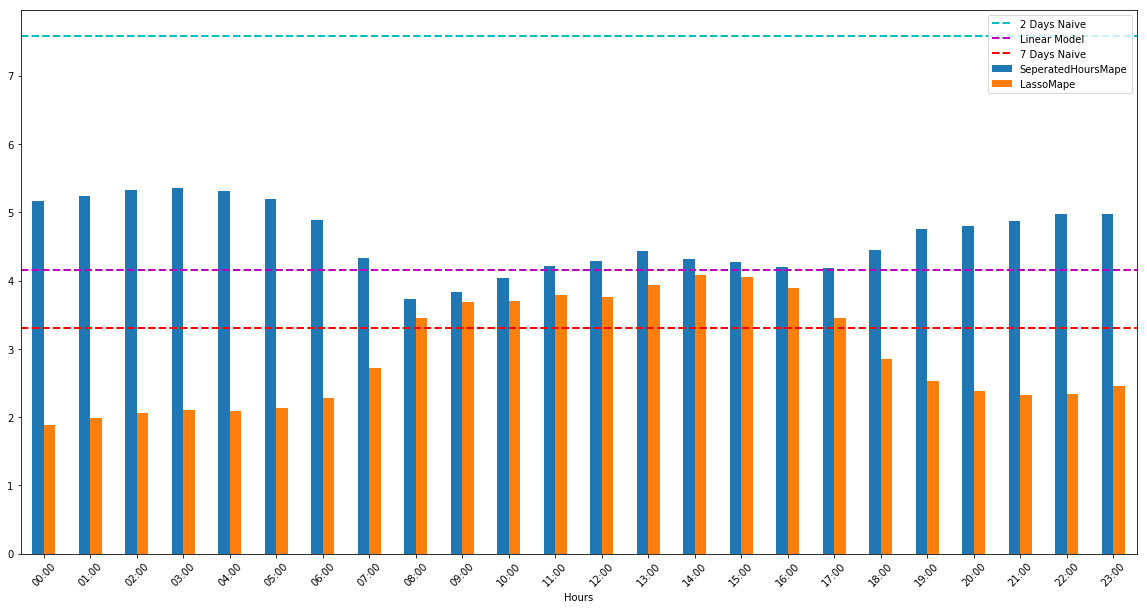

In [25]:
pd.DataFrame.from_dict({'Hours': hour_list,
                        'SeperatedHoursMape': mape_list_c,
                        'LassoMape': mape_list_d}).set_index('Hours').plot(kind='bar', figsize=(20,10))
plt.axhline(answer_a_2, color='c', linestyle='--', linewidth=2, label='2 Days Naive')
plt.axhline(answer_b, color='m', linestyle='--', linewidth=2, label='Linear Model')
plt.axhline(answer_a_7, color='r', linestyle='--', linewidth=2, label='7 Days Naive')
plt.legend()
plt.xticks(rotation=45)
plt.show()